# Eddas
Note: in order to use this **Jupyter notebook**, you need at least **python 3.6** or above.

Why this notbook? You can retrieve and process easily the Eddas (the Poetic one and the Snorri's one). 

If you want to get more tools for Old Norse, use **cltk** (https://github.com/cltk/cltk.git). Here is the docs: http://docs.cltk.org/en/latest/old_norse.html.

### Configuration

Install the modules.
```bash
$ git clone https://github.com/clemsciences/old_norse_texts_heimskringla.git eddas
$ cd eddas
$ sudo pip3.6 install -r requirements.txt
$ sudo pip3.6 install .
```

Install the **kernel** associated with **python3.6** [https://ipython.readthedocs.io/en/stable/install/kernel_install.html](https://ipython.readthedocs.io/en/stable/install/kernel_install.html) 

Let's test if the import is correct:
```bash
$ python3.6
```

In [1]:
import eddas

It works! So let's continue with some predefined data.

In [2]:
from eddas import reader

The reader module uses the **NLTK** TaggedCorpusReader class. 

#### The POS annotated Völuspá
The POS tagset is available at http://nlp.cs.ru.is/pdf/Tagset.pdf.

In [3]:
pos_voeluspaa = reader.PoeticEddaPOSTaggedReader("Völuspá")

Raw POS annotated text :

In [4]:
print(pos_voeluspaa.raw()[:300])

1/ta
Hljóðs/nhee bið/sfg1eþ ek/fp1en allar/lvfosf
helgar/lvfosf kindir/nvfo ,/p
meiri/lvfovm ok/cc minni/lvfovm
mögu/nkfo Heimdallar/nkeem ;/p
viltu/sfg2en at/cn ek/fp1em ,/p Valföðr/nkenm ,/p
vel/aa fyr/cn telja/sng
forn/lhfosf spjöll/nhfo fira/nkfe ,/p
þau/fa er/ct fremst/aa of/aa man/sfg1en ./p




The first paragraph :

In [5]:
print(pos_voeluspaa.paras()[0])

[['1'], ['Hljóðs', 'bið', 'ek', 'allar'], ['helgar', 'kindir', ','], ['meiri', 'ok', 'minni'], ['mögu', 'Heimdallar', ';'], ['viltu', 'at', 'ek', ',', 'Valföðr', ','], ['vel', 'fyr', 'telja'], ['forn', 'spjöll', 'fira', ','], ['þau', 'er', 'fremst', 'of', 'man', '.']]


#### The lemmatized Völuspá
Lemmata are from the Zoëga's dictionary that you can retrieve from https://github.com/cltk/old_norse_dictionary_zoega.

In [6]:
lem_voeluspaa = reader.PoeticEddaLemmatizationReader("Völuspá")

Sentences in the corpus are "short lines" in the Germanic tradition sense.

Without annotations:

In [7]:
lem_voeluspaa.sents()[3]

['meiri', 'ok', 'minni']

With annotations:

In [8]:
[(token, lemma.lower()) for token, lemma in lem_voeluspaa.tagged_sents()[3]]

[('meiri', 'mjök'), ('ok', 'ok'), ('minni', 'lítill')]

#### The syllabified Völuspá
Syllables are separated by a plus sign.

In [9]:
syl_voeluspaa = reader.PoeticEddaSyllabifiedReader("Völuspá")

In [10]:
syl_voeluspaa.tagged_words()[10:20]

[('Heimdallar', 'HEIM+DAL+LAR'),
 ('viltu', 'VI+LTU'),
 ('at', 'AT'),
 ('ek', 'EK'),
 ('Valföðr', 'VAL+FÖÐR'),
 ('vel', 'VEL'),
 ('fyr', 'FYR'),
 ('telja', 'TEL+JA'),
 ('forn', 'FORN'),
 ('spjöll', 'SPJÖLL')]

In [11]:
import os
from eddas import reader
from eddas import text_manager
from cltk.tokenize.word import tokenize_old_norse_words
from nltk.text import Text
print(reader.poetic_edda_titles)

['Rígsþula', 'Helreið Brynhildar', 'Gróttasöngr', 'Sigrdrífumál', 'Hárbarðsljóð', 'Grímnismál', 'Þrymskviða', 'Völuspá', 'Atlamál in grænlenzku', 'Hyndluljóð', 'Skírnismál', 'Hymiskviða', 'Atlakviða', 'Vafþrúðnismál', 'Oddrúnarkviða', 'Völundarkviða', 'Alvíssmál', 'Fáfnismál', 'Dráp Niflunga', 'Hávamál', 'Guðrúnarhvöt', 'Hamðismál', 'Baldrs draumar', 'Lokasenna', 'Guðrúnarkviða']


In [12]:
poetic_edda_texts = []
for title in reader.poetic_edda_titles:
    text_loader = text_manager.TextLoader(os.path.join("Sæmundar-Edda", title), "txt")
    poetic_edda_texts.append(Text(tokenize_old_norse_words(text_loader.load()), title))

In [13]:
from nltk.text import TextCollection
tc = TextCollection(poetic_edda_texts)

In [14]:
PUNCTUATION = [",", ".", ";", "-", "?", "!", ":"]

l_number_of_tokens = []
l_number_of_forms = []
for text in poetic_edda_texts:
    print(text.name)
    number_of_tokens = 0
    number_of_forms = 0
    vocabulary = text.vocab()
    for token in vocabulary:
        if token not in PUNCTUATION:
            number_of_tokens += vocabulary[token]
            number_of_forms += 1
#     print("Number of token", number_of_tokens)
#     print("Number of forms", number_of_forms)
    l_number_of_tokens.append(number_of_tokens)
    l_number_of_forms.append(number_of_forms)

Rígsþula
Helreið Brynhildar
Gróttasöngr
Sigrdrífumál
Hárbarðsljóð
Grímnismál
Þrymskviða
Völuspá
Atlamál in grænlenzku
Hyndluljóð
Skírnismál
Hymiskviða
Atlakviða
Vafþrúðnismál
Oddrúnarkviða
Völundarkviða
Alvíssmál
Fáfnismál
Dráp Niflunga
Hávamál
Guðrúnarhvöt
Hamðismál
Baldrs draumar
Lokasenna
Guðrúnarkviða


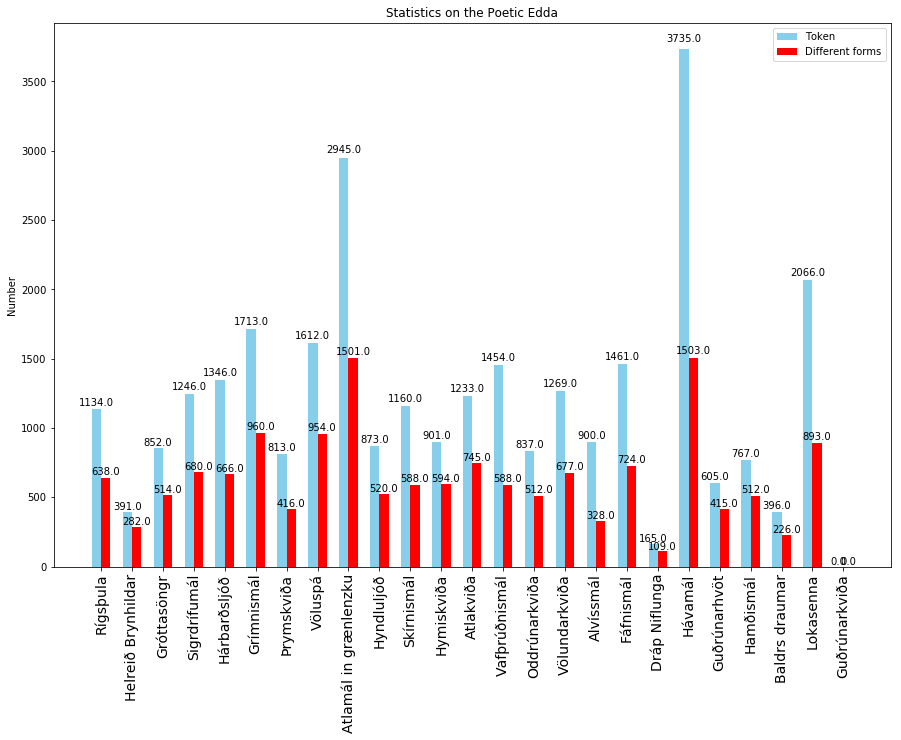

In [15]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (15,10)


l_number_of_tokens
l_number_of_forms

ind = np.arange(len(l_number_of_tokens))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, l_number_of_tokens, width,
                color='SkyBlue', label='Token')
rects2 = ax.bar(ind + width/2, l_number_of_forms, width,
                color='Red', label='Different forms')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('Statistics on the Poetic Edda')
ax.set_xticks(ind)
ax.set_xticklabels(reader.poetic_edda_titles)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    # specify integer or one of preset strings, e.g.
    #tick.label.set_fontsize('x-small') 
    tick.label.set_rotation('vertical')

ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

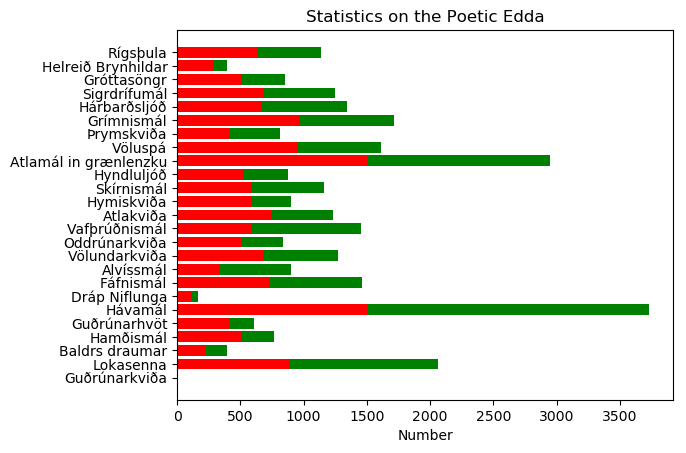

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(l_number_of_tokens))

rects1 = ax.barh(y_pos, l_number_of_tokens, align='center',
        color='green', ecolor='black', label="Number of Tokens")

rects2 = ax.barh(y_pos, l_number_of_forms, color='Red', label='Different forms')

ax.set_yticks(y_pos)
ax.set_yticklabels(reader.poetic_edda_titles)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_title('Statistics on the Poetic Edda')



plt.show()

The Völuspá is currently being annotated. The other poems of the Poetic Edda may also be annotated so if you want to join, go into https://github.com/cltk/old_norse_texts_heimskringla.

By Clément Besnier, email address: clemsciences@aol.com, web site: https://clementbesnier.fr/, twitter: clemsciences